In [65]:
import numpy as np
import pandas as pd

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [67]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")
test_survived = pd.read_csv("gender_submission.csv") 
## I prefer merging test and gender_submission, then joining train, later I will split them by using PassengerId.
## By combining data set, we do not need to apply functions to train and test group, separately. Also, filling missing values
## based on combined data set might provide a better result.

In [68]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [70]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


PassengerId 1-891 are train group, PassengerID 892-1309 are test group. I will use this information to split train and test in the end.

In [72]:
test_survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [73]:
test["Survived"] = test_survived["Survived"]

In [74]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [75]:
## Reordering columns of test similar to train 
test = test[["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]]

In [76]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [77]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
## Now, train and test have columns in the same order
titanic = train.append(test, ignore_index= True)

In [15]:
## Now, we have 1308 passengers in the same data frame
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [16]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
PassengerId    1309 non-null int64
Survived       1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


We have many missing values in Age and 2 missing values in Embarked. Fare is related to Pclass, since we will use Pclass, we can later drop Fare

In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


37.8% of passengers survived after the disaster. 
Average age is 29.9 (ignoring missing values). Max age is 80. 
49.9% of passengers had siblings or spouse and 38.5% of passengers had parent of child/children.

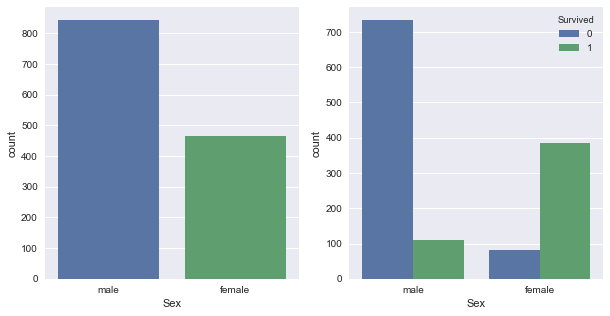

In [19]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize = (10, 5))

sns.countplot(x="Sex", data= titanic, ax= axis1)
sns.countplot(x="Sex", hue= "Survived", data= titanic, ax = axis2)

There were more male passengers however number of survived female is way higher than of male.

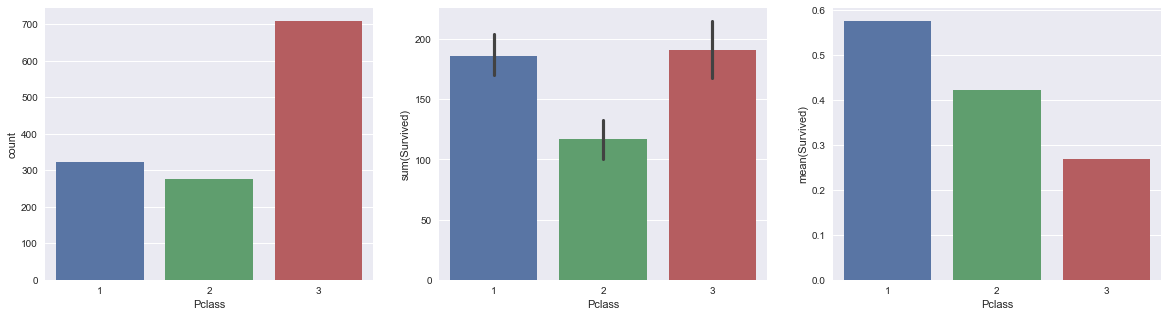

In [20]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (20, 5))
pclass_survived = titanic[["Pclass", "Survived"]].groupby(["Pclass"], as_index= False).mean()

sns.countplot(x= "Pclass", data= titanic, ax= axis1)
sns.barplot(x= "Pclass", y= "Survived", data= titanic, estimator= sum, ax= axis2)
sns.barplot(x= "Pclass", y= "Survived", data= pclass_survived, ax= axis3)

Majority of passenger are 3rd class. Though number of survived passengers are closed to each other for 1st and 3rd class passengers, percentage of survival for 1st class is almost double of 3rd class. 
As expected, the better the passenger class is, the more likely a passenger survives.

<function matplotlib.pyplot.tight_layout>

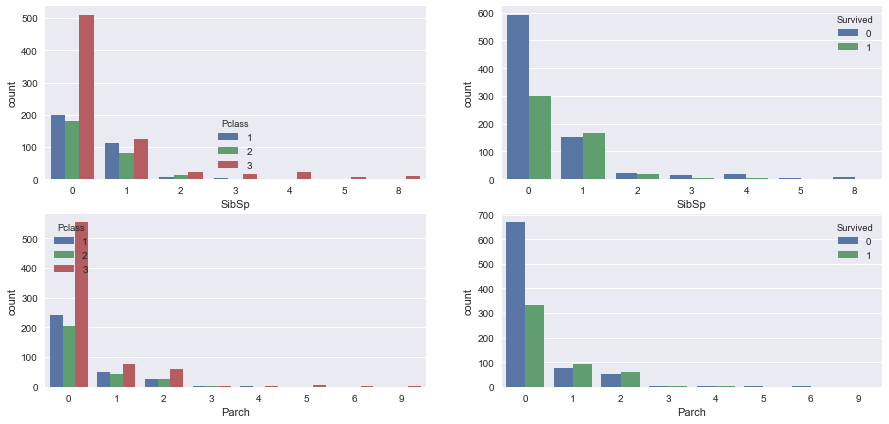

In [21]:
fig, axes = plt.subplots(figsize = (15, 7), ncols= 2, nrows= 2)
sns.countplot(x="SibSp", hue = "Pclass", data= titanic, ax = axes[0, 0])
sns.countplot(x="SibSp", hue = "Survived", data= titanic, ax = axes[0, 1])
sns.countplot(x="Parch", hue = "Pclass", data= titanic, ax = axes[1, 0])
sns.countplot(x="Parch", hue = "Survived", data= titanic, ax = axes[1, 1])
plt.tight_layout

Majority of single passengers (no sibling, no spouse, no parent, no child) are 3rd class passenger, which also explains why survival rate is low for 0 Sibsp or 0 Parch.

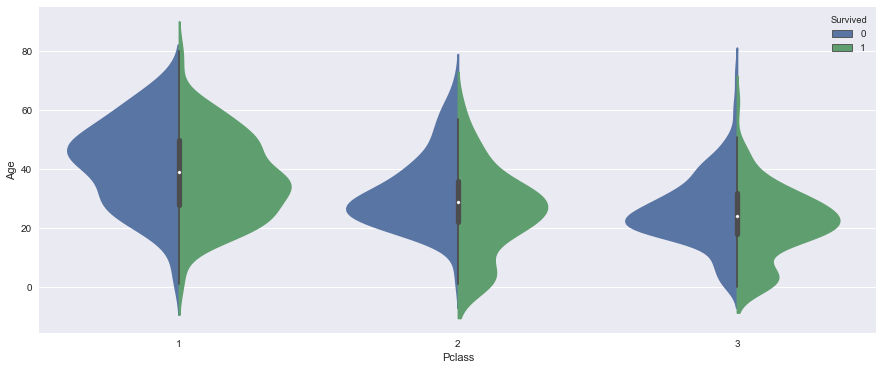

In [22]:
plt.subplots(figsize= (15,6))
sns.violinplot(x= "Pclass", y= "Age", data= titanic, hue= "Survived", split= True)

In general, age of survived people is less than of non-survived people. Also, this is valid for each passenger type.

In [23]:
## Creating a new column for na is Cabin; 1 for na, 0 for non-na in Cabin
titanic["cabin_na"] = np.where(titanic["Cabin"].isnull(), 1, 0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


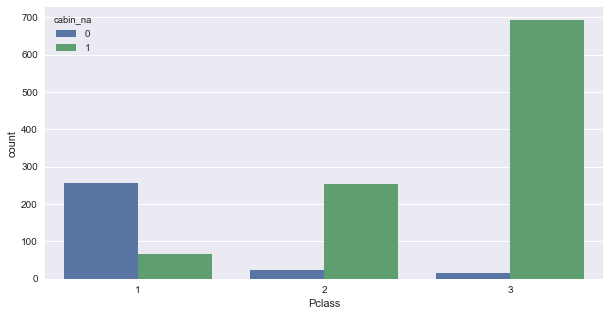

In [24]:
## Elaborating Cabin 
plt.subplots(figsize = (10, 5))
sns.countplot(x="Pclass", hue = "cabin_na", data= titanic)

It seems Cabin values are missing mainly for 3rd class.
Later, we can drop Cabin since we will use Pclass

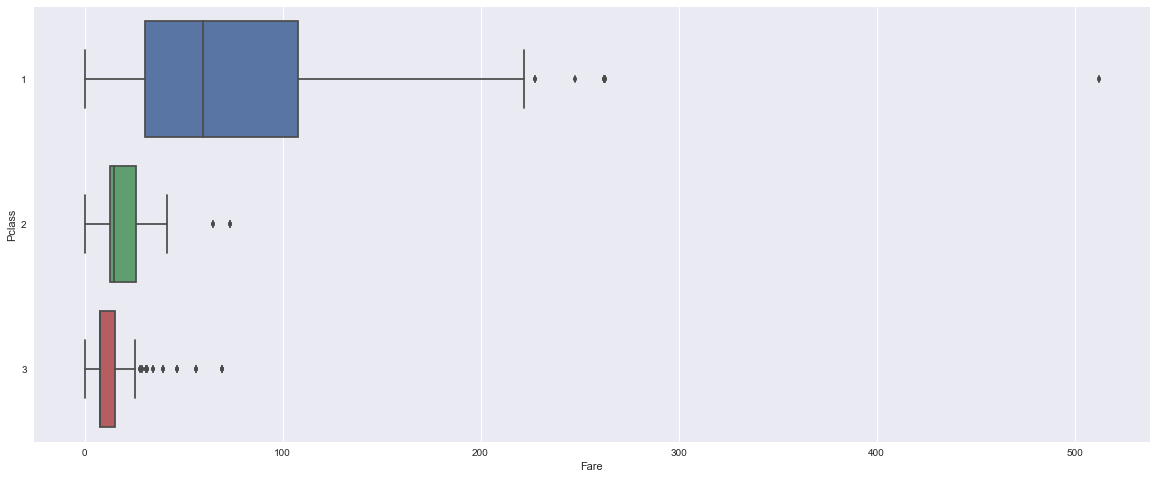

In [25]:
## Fare vs Pclass
plt.subplots(figsize= (20, 8))
sns.boxplot(x="Fare", y= "Pclass", data= titanic, orient="horizontal")

As expected, fare is higher for 1st class, then 2nd class. Fare and Pclass are related. We can drop Fare later and go on with Pclass.

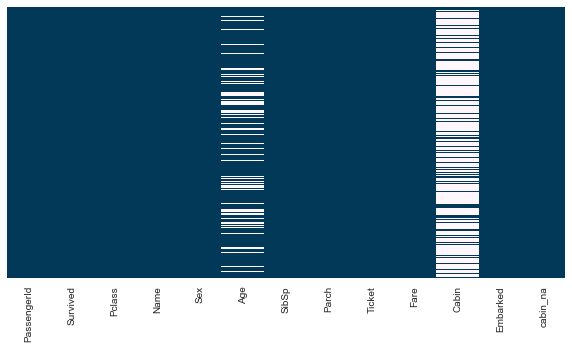

In [26]:
## Checking missing values visually in data set
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(titanic.isnull(), yticklabels= False, cbar= False, cmap= "PuBu_r", ax = ax)

There are many missing values in Age, though missing values in Embarked are not visible now. However, we know by .info() that there are 2 missing values in Embarked. 
So Cabin will be dropped later, so we can ignore it.

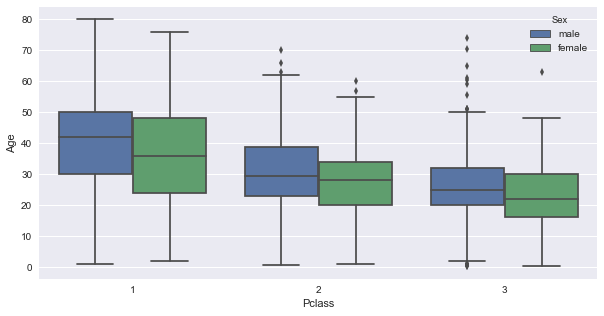

In [27]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.boxplot(x= "Pclass", y= "Age", data= titanic, hue ="Sex", ax = ax)

The better the passenger class is, the higher the age is. It is reasonable that people gained wealth as they got older so that they could buy better passenger class.
Also, in all class type, average (so is median) is higher for male than female.
We can see average ages regarding passenger class and sex. Then, we can fill missing values in Age by using average ages.

In [79]:
avg_age_by_Pclass_Sex = pd.pivot_table(data= titanic, values= "Age", index= "Sex", columns="Pclass", aggfunc="mean")
median_age_by_Pclass_Sex = pd.pivot_table(data= titanic, values= "Age", index= "Sex", columns="Pclass", aggfunc="median")
print("Average of Ages")
print(round(avg_age_by_Pclass_Sex))
print("************************")
print("Median of Ages")
print(round(median_age_by_Pclass_Sex))

Average of Ages
Pclass     1     2     3
Sex                     
female  37.0  27.0  22.0
male    41.0  31.0  26.0
************************
Median of Ages
Pclass     1     2     3
Sex                     
female  36.0  28.0  22.0
male    42.0  30.0  25.0


In general, mean ages and median ages are very close to each other. I prefer using mean ages to fill missing values.

In [29]:
## Defining function to fill missing ages regarding passenger class and sex
def impute_age(age_age):
    Age = age_age[0]
    Pclass = age_age[1]
    Sex = age_age[2]
    
    if pd.isnull(Age):
        if Pclass == 1:
            if Sex == "female":
                return 37
            else:
                return 41
        elif Pclass == 2:
            if Sex == "female":
                return 27
            else:
                return 31
        else:
            if Sex == "female":
                return 22
            else:
                return 26
    else:
        return Age

In [30]:
## Filling missing ages regarding passenger class and sex
titanic["Age"] = titanic[["Age", "Pclass", "Sex"]].apply(impute_age, axis = 1)

In [31]:
## Check whether there is na in age column
titanic[pd.isnull(titanic["Age"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_na


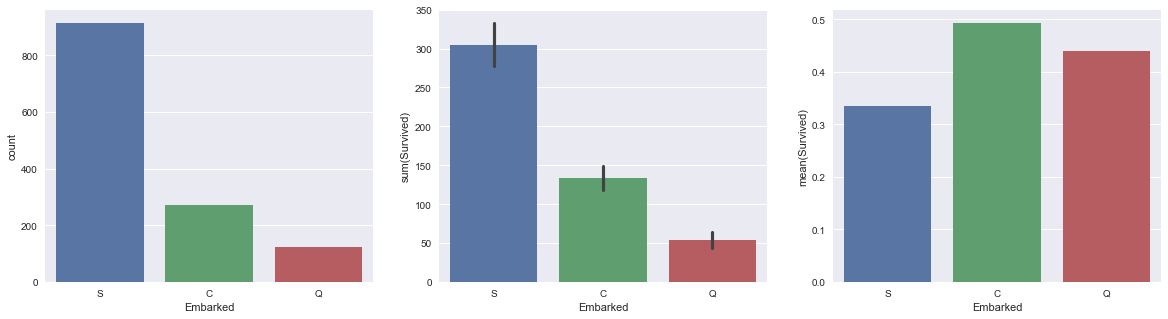

In [32]:
#Elaborating Embarked
embarked_percent_survived = titanic[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (20, 5))
sns.countplot(x= "Embarked", data= titanic, ax= axis1)
sns.barplot(x= "Embarked", y= "Survived", data= titanic, estimator= sum, ax= axis2)
sns.barplot(x= "Embarked", y= "Survived", data= embarked_percent_survived, ax= axis3, order=["S", "C", "Q"])

Majority of passenger aboarded from S. 
However, embarked port likely did not have to do with survival.

In [33]:
## Check whether there is na in embarked column
titanic[pd.isnull(titanic["Embarked"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_na
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,0


In [34]:
## There are 2 na in Embarked, so we can fill it with S, which is the highest number among S, C and Q
titanic["Embarked"] = titanic["Embarked"].fillna("S")

In [35]:
sex_dummy = pd.get_dummies(titanic["Sex"], drop_first= True)
sex_dummy.head()

,male
0,1
1,0
2,0
3,0
4,1


In [36]:
embarked_dummy = pd.get_dummies(titanic["Embarked"])

In [37]:
## Sincle Q is the lowest among S, C and Q,we can drop Q
embarked_dummy.drop(["Q"], axis=1, inplace= True)
embarked_dummy.head()

,C,S
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [38]:
## Changing column names
embarked_dummy.columns = ["embarked_C", "embarked_S"]
embarked_dummy.head()

,embarked_C,embarked_S
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1


In [39]:
def age_range(age_age_2):
    Age = age_age_2[0]
    if Age <= 20:
        return "less_than_20"
    elif (Age > 20) & (Age <= 40):
        return "age_between_21_40"
    elif (Age > 40) & (Age <= 60):
        return "age_between_41_60"
    else:
        return "age>60"

In [40]:
titanic["age_range"] = titanic[["Age"]].apply(age_range, axis= 1)

In [41]:
age_range_survived = titanic[["age_range", "Survived"]].groupby("age_range", as_index=False).mean()

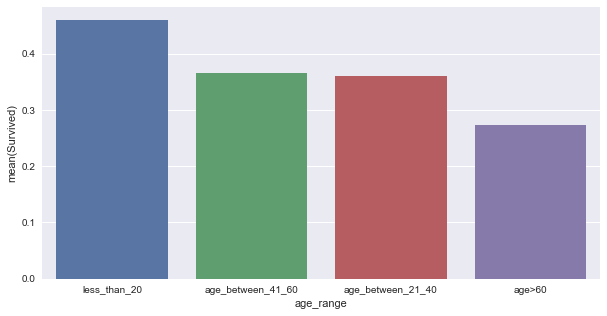

In [42]:
plt.subplots(figsize= (10, 5))
sns.barplot(x= "age_range", y="Survived", data= age_range_survived, order = ["less_than_20", "age_between_41_60", "age_between_21_40", "age>60"])

This is fairly consistent with the violing plot; younger people are likely to survive.

In [43]:
age_range_dummy = pd.get_dummies(titanic["age_range"], drop_first= True)
age_range_dummy.head()

,age_between_21_40,age_between_41_60,less_than_20
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [44]:
pclass_dummy = pd.get_dummies(titanic["Pclass"], drop_first= True)
pclass_dummy.head()

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [45]:
## Changing column names
pclass_dummy.columns = ["pclass_2", "pclass_3"]
pclass_dummy.head()

,pclass_2,pclass_3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [46]:
titanic_with_dummies = pd.concat([titanic, sex_dummy, embarked_dummy, age_range_dummy, pclass_dummy], axis=1)

In [47]:
titanic_with_dummies.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_na',
       'age_range', 'male', 'embarked_C', 'embarked_S',
       'age_between_21_40', 'age_between_41_60', 'less_than_20',
       'pclass_2', 'pclass_3'], dtype=object)

In [48]:
## Splitting Titanic data set into original train and test set by using PassengerId (PassengerId 1-886 are train, 
## PassengerId 887-1309)
titanic_train = titanic_with_dummies[titanic_with_dummies["PassengerId"] <= 891]
titanic_test = titanic_with_dummies[titanic_with_dummies["PassengerId"]>=892]

In [49]:
## By X_train, we will predict y_train so that the model is created. Then, we will apply the model to X_test and predict
## survival, which is "predictions". Later, we will compare y_test and predictions.
## Creating y_train and y_test
y_train = titanic_train["Survived"]
y_test = titanic_test["Survived"]

In [50]:
## Dropping irrelevant columns and creating X_train and X_test
X_train = titanic_train.drop(["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "Ticket", "Fare", "Cabin", "Embarked", "cabin_na", "age_range"], axis= 1)
X_test = titanic_test.drop(["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "Ticket", "Fare", "Cabin", "Embarked", "cabin_na", "age_range"], axis= 1)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
logmodel = LogisticRegression()

In [53]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
predictions = logmodel.predict(X_test)

In [55]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.97      0.95      0.96       266
          1       0.91      0.94      0.93       152

avg / total       0.95      0.94      0.95       418

[[252  14]
 [  9 143]]


In [56]:
logmodel.score(X_train, y_train)

0.80920314253647585

In [57]:
logmodel.score(X_test, y_test)

0.94497607655502391

In [63]:
titanic_result = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": predictions
    })
titanic_result.to_csv('titanic_result.csv', index=False)

In [64]:
titanic_result

,PassengerId,Survived
891,892,0
892,893,0
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0
